In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os 
import sys
import pickle
import re

import numpy as np
import pandas as pd

base_path = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(base_path)
print(base_path)

/root/geonhee/pausa_mitsloan


In [3]:
import loader as io
import obso as obs
from trace_snapshot import TraceSnapshot

In [4]:
provider = "dfl" # "bepro" or "dfl"

if provider == "bepro":
    bepro_data_dir = os.path.join(base_path, "data", "bepro", "elastic")
    game_id = 153373
    loader = io.ElasticLoader(bepro_data_dir, game_id)
elif provider == "dfl":
    # open DFL data: DFL-MAT-J03WMX, DFL-MAT-J03WR9, DFL-MAT-J03WN1, DFL-MAT-J03WOH, DFL-MAT-J03WOY, DFL-MAT-J03WPY, DFL-MAT-J03WQQ
    dfl_data_dir = os.path.join(base_path, "data", "dfl", "elastic")
    game_id = "DFL-MAT-J03WMX"
    loader = io.ElasticLoader(dfl_data_dir, game_id)
else:
    raise ValueError("Provider not supported.")

loader

## Event & Tracking Data Loading

In [5]:
raw_tracking_home = loader.get_trace_data("Home") # 1s
raw_tracking_home = loader.to_single_playing_direction(raw_tracking_home)
raw_tracking_home = loader.calc_player_velocities(raw_tracking_home)

x_cols = [col for col in raw_tracking_home.columns if re.match('Home_\d*_x', col)] + ["ball_x"]
y_cols = [col for col in raw_tracking_home.columns if re.match('Home_\d*_y', col)] + ["ball_y"]

tracking_home = raw_tracking_home.copy(deep=True)
tracking_home[x_cols] += 52.5
tracking_home[y_cols] += 34

tracking_home

,period_id,frame_id,Home_11_x,Home_14_x,Home_17_x,Home_2_x,Home_20_x,Home_24_x,Home_25_x,Home_27_x,...,Home_4_vx,Home_4_vy,Home_6_vx,Home_6_vy,Home_7_vx,Home_7_vy,Home_8_vx,Home_8_vy,ball_vx,ball_vy
0,1,10000,45.60,39.42,NaN,35.24,5.13,33.66,NaN,54.62,...,0.964286,-0.312500,7.142857e-01,-1.250000,0.169643,0.026786,NaN,NaN,14.541667,0.500000
1,1,10001,45.68,39.44,NaN,35.27,5.16,33.71,NaN,54.78,...,0.928571,-0.303571,7.142857e-01,-1.250000,0.196429,-0.017857,NaN,NaN,14.416667,0.500000
2,1,10002,45.78,39.45,NaN,35.32,5.20,33.75,NaN,54.94,...,0.892857,-0.294643,7.142857e-01,-1.250000,0.223214,-0.062500,NaN,NaN,14.333333,0.583333
3,1,10003,45.88,39.47,NaN,35.35,5.24,33.80,NaN,55.11,...,0.857143,-0.285714,7.142857e-01,-1.250000,0.250000,-0.107143,NaN,NaN,14.333333,0.583333
4,1,10004,46.00,39.48,NaN,35.39,5.28,33.85,NaN,55.28,...,0.857143,-0.321429,7.142857e-01,-1.285714,0.285714,-0.142857,NaN,NaN,14.333333,0.583333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85364,2,175122,NaN,57.89,39.35,NaN,5.36,32.38,65.83,NaN,...,-1.178571,0.678571,4.060224e-13,0.714286,0.250000,-0.750000,0.964286,-0.678571,7.750000,1.000000
85365,2,175123,NaN,57.88,39.35,NaN,5.39,32.43,65.80,NaN,...,-1.142857,0.642857,7.142857e-02,0.750000,0.250000,-0.750000,0.892857,-0.678571,7.416667,1.083333
85366,2,175124,NaN,57.88,39.35,NaN,5.42,32.49,65.76,NaN,...,-1.160714,0.633929,9.821429e-02,0.732143,0.250000,-0.750000,0.848214,-0.696429,7.250000,0.916667
85367,2,175125,NaN,57.89,39.35,NaN,5.47,32.54,65.72,NaN,...,-1.178571,0.625000,1.250000e-01,0.714286,0.250000,-0.750000,0.803571,-0.714286,7.083333,1.000000


In [6]:
raw_tracking_away = loader.get_trace_data("Away") # 1s
raw_tracking_away = loader.to_single_playing_direction(raw_tracking_away)
raw_tracking_away = loader.calc_player_velocities(raw_tracking_away)

x_cols = [col for col in raw_tracking_away.columns if re.match('Away_\d*_x', col)] + ['ball_x']
y_cols = [col for col in raw_tracking_away.columns if re.match('Away_\d*_y', col)] + ['ball_y']

tracking_away = raw_tracking_away.copy(deep=True)
tracking_away[x_cols] += 52.5
tracking_away[y_cols] += 34

tracking_away

,period_id,frame_id,Away_10_x,Away_11_x,Away_13_x,Away_2_x,Away_22_x,Away_25_x,Away_27_x,Away_38_x,...,Away_5_vx,Away_5_vy,Away_6_vx,Away_6_vy,Away_7_vx,Away_7_vy,Away_8_vx,Away_8_vy,ball_vx,ball_vy
0,1,10000,52.39,52.08,NaN,68.55,NaN,54.03,99.23,51.98,...,0.839286,0.223214,-0.794643,-0.196429,-1.794643,0.544643,NaN,NaN,14.541667,0.500000
1,1,10001,52.42,51.91,NaN,68.48,NaN,53.95,99.21,51.87,...,0.857143,0.196429,-0.803571,-0.250000,-1.910714,0.589286,NaN,NaN,14.416667,0.500000
2,1,10002,52.46,51.73,NaN,68.42,NaN,53.77,99.18,51.76,...,0.875000,0.169643,-0.812500,-0.303571,-2.026786,0.633929,NaN,NaN,14.333333,0.583333
3,1,10003,52.49,51.57,NaN,68.36,NaN,53.57,99.15,51.66,...,0.892857,0.142857,-0.821429,-0.357143,-2.142857,0.678571,NaN,NaN,14.333333,0.583333
4,1,10004,52.51,51.40,NaN,68.30,NaN,53.38,99.12,51.55,...,0.928571,0.142857,-0.821429,-0.392857,-2.250000,0.750000,NaN,NaN,14.333333,0.583333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85364,2,175122,46.20,NaN,38.87,61.36,62.69,NaN,91.74,NaN,...,1.250000,-0.964286,-0.214286,-1.321429,0.392857,-0.214286,-0.5,1.5,7.750000,1.000000
85365,2,175123,46.28,NaN,38.92,61.29,62.56,NaN,91.69,NaN,...,1.214286,-0.964286,-0.214286,-1.285714,0.392857,-0.214286,-0.5,1.5,7.416667,1.083333
85366,2,175124,46.37,NaN,38.97,61.24,62.41,NaN,91.65,NaN,...,1.205357,-0.955357,-0.223214,-1.250000,0.392857,-0.205357,-0.5,1.5,7.250000,0.916667
85367,2,175125,46.45,NaN,39.02,61.18,62.27,NaN,91.59,NaN,...,1.196429,-0.946429,-0.232143,-1.214286,0.392857,-0.196429,-0.5,1.5,7.083333,1.000000


In [7]:
overlap_cols = [col for col in tracking_home.columns if col in tracking_away.columns]
overlap_cols

['period_id',
 'frame_id',
 'ball_x',
 'ball_y',
 'time_seconds',
 'utc_timestamp',
 'ball_state',
 'ball_owning_team_id',
 'team',
 'ball_vx',
 'ball_vy']

In [8]:
traces = pd.concat(
          [tracking_home, tracking_away.drop(columns=overlap_cols)],
          axis=1
      )
traces = traces[sorted(traces.columns)]
traces.columns = traces.columns.str.replace('Home', 'H', regex=False)
traces.columns = traces.columns.str.replace('Away', 'A', regex=False)
traces.columns = traces.columns.str.replace('ball', 'B00', regex=False)
traces

,A_10_vx,A_10_vy,A_10_x,A_10_y,A_11_vx,A_11_vy,A_11_x,A_11_y,A_13_vx,A_13_vy,...,B00_state,B00_vx,B00_vy,B00_x,B00_y,frame_id,period_id,team,time_seconds,utc_timestamp
0,0.821429,-0.035714,52.39,55.87,-4.321429,0.955357,52.08,0.78,NaN,NaN,...,alive,14.541667,0.500000,52.32,34.17,10000,1,Away,0.00,2023-05-27 13:30:12.230
1,0.785714,-0.071429,52.42,55.87,-4.285714,0.982143,51.91,0.82,NaN,NaN,...,alive,14.416667,0.500000,52.90,34.19,10001,1,Away,0.04,2023-05-27 13:30:12.270
2,0.750000,-0.107143,52.46,55.86,-4.250000,1.008929,51.73,0.86,NaN,NaN,...,alive,14.333333,0.583333,53.47,34.21,10002,1,Away,0.08,2023-05-27 13:30:12.310
3,0.714286,-0.142857,52.49,55.85,-4.214286,1.035714,51.57,0.90,NaN,NaN,...,alive,14.333333,0.583333,54.04,34.24,10003,1,Away,0.12,2023-05-27 13:30:12.350
4,0.607143,-0.178571,52.51,55.85,-4.214286,1.000000,51.40,0.94,NaN,NaN,...,alive,14.333333,0.583333,54.62,34.26,10004,1,Away,0.16,2023-05-27 13:30:12.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85364,2.214286,-0.285714,46.20,52.74,0.000000,0.000000,NaN,NaN,1.25,-1.285714,...,alive,7.750000,1.000000,56.30,45.69,175122,2,Home,3004.88,2023-05-27 15:25:48.270
85365,2.178571,-0.250000,46.28,52.73,0.000000,0.000000,NaN,NaN,1.25,-1.357143,...,alive,7.416667,1.083333,56.60,45.72,175123,2,Home,3004.92,2023-05-27 15:25:48.310
85366,2.107143,-0.196429,46.37,52.72,0.000000,0.000000,NaN,NaN,1.25,-1.410714,...,alive,7.250000,0.916667,56.88,45.77,175124,2,Home,3004.96,2023-05-27 15:25:48.350
85367,2.035714,-0.142857,46.45,52.71,0.000000,0.000000,NaN,NaN,1.25,-1.464286,...,alive,7.083333,1.000000,57.17,45.80,175125,2,Home,3005.00,2023-05-27 15:25:48.390


In [9]:
events = loader.get_event_data()
events = loader.to_single_playing_direction(events)

events

/root/geonhee/pausa_mitsloan/loader.py:326: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  event_df = pd.concat([event_df, receive_event_df], ignore_index=True)


,game_id,period_id,frame_id,receive_frame_id,prev_receive_frame_id,team_id,team,player_id,player_name,player_code,receiver_code,spadl_type,success,start_x,start_y
0,DFL-MAT-J03WMX,1,10000.0,10025.0,NaN,DFL-CLU-00000G,Away,DFL-OBJ-0027G6,Serge Gnabry,Away_7,Away_2,pass,True,0.00,0.00
1,DFL-MAT-J03WMX,1,10025.0,NaN,NaN,DFL-CLU-00000G,Away,DFL-OBJ-0027KL,Dayot Upamecano,Away_2,None,receive,True,15.26,-0.03
2,DFL-MAT-J03WMX,1,10040.0,10131.0,10025.0,DFL-CLU-00000G,Away,DFL-OBJ-0027KL,Dayot Upamecano,Away_2,Out,pass,False,14.23,0.20
3,DFL-MAT-J03WMX,1,10415.0,10512.0,NaN,DFL-CLU-000008,Home,DFL-OBJ-0002BO,B. Schmitz,Home_2,Away_2,throw_in,False,-27.15,-34.00
4,DFL-MAT-J03WMX,1,10512.0,NaN,NaN,DFL-CLU-00000G,Away,DFL-OBJ-0027KL,Dayot Upamecano,Away_2,None,receive,False,2.40,-24.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2274,DFL-MAT-J03WMX,2,174720.0,NaN,NaN,DFL-CLU-000008,Home,DFL-OBJ-00012X,Jonas Hector,Home_14,None,receive,True,-14.39,30.51
2275,DFL-MAT-J03WMX,2,174724.0,174769.0,174720.0,DFL-CLU-000008,Home,DFL-OBJ-00012X,Jonas Hector,Home_14,Away_2,pass,False,-14.13,30.99
2276,DFL-MAT-J03WMX,2,174769.0,NaN,NaN,DFL-CLU-00000G,Away,DFL-OBJ-0027KL,Dayot Upamecano,Away_2,None,receive,False,1.71,28.22
2277,DFL-MAT-J03WMX,2,174769.0,NaN,NaN,DFL-CLU-00000G,Away,DFL-OBJ-0027KL,Dayot Upamecano,Away_2,None,interception,True,2.60,28.28


In [10]:
events_df = loader.convert_common_format_for_event(events, raw_tracking_home, raw_tracking_away)
events_df = loader.check_home_away_event(events_df, raw_tracking_home, raw_tracking_away)
#events_df['event_zone'] = obs.check_event_zone(events_df, raw_tracking_home, raw_tracking_away)['zone']

x_cols = ["start_x", "end_x"]
y_cols = ["start_y", "end_y"]

events_df[x_cols] += 52.5
events_df[y_cols] += 34

events_df

Team Name OK: kickoff=Away, event first team= Away


,game_id,period_id,receive_frame,start_frame,end_frame,start_time_seconds,end_time_seconds,player_name,player_code,receiver_code,team,receiver_team,type_name,result_name,start_x,start_y,end_x,end_y
0,DFL-MAT-J03WMX,1,NaN,10000.0,10025.0,0.00,1.00,Serge Gnabry,Away_7,Away_2,Away,Away,pass,True,52.50,34.00,67.76,33.97
1,DFL-MAT-J03WMX,1,NaN,10025.0,NaN,1.00,NaN,Dayot Upamecano,Away_2,None,Away,None,receive,True,67.76,33.97,NaN,NaN
2,DFL-MAT-J03WMX,1,10025.0,10040.0,10131.0,1.60,5.24,Dayot Upamecano,Away_2,Out,Away,Out,pass,False,66.73,34.20,NaN,NaN
3,DFL-MAT-J03WMX,1,NaN,10415.0,10512.0,16.60,20.48,B. Schmitz,Home_2,Away_2,Home,Away,throw_in,False,25.35,0.00,54.90,9.69
4,DFL-MAT-J03WMX,1,NaN,10512.0,NaN,20.48,NaN,Dayot Upamecano,Away_2,None,Away,None,receive,False,54.90,9.69,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2274,DFL-MAT-J03WMX,2,NaN,174720.0,NaN,2988.80,NaN,Jonas Hector,Home_14,None,Home,None,receive,True,38.11,64.51,NaN,NaN
2275,DFL-MAT-J03WMX,2,174720.0,174724.0,174769.0,2988.96,2990.76,Jonas Hector,Home_14,Away_2,Home,Away,pass,False,38.37,64.99,54.21,62.22
2276,DFL-MAT-J03WMX,2,NaN,174769.0,NaN,2990.76,NaN,Dayot Upamecano,Away_2,None,Away,None,receive,False,54.21,62.22,NaN,NaN
2277,DFL-MAT-J03WMX,2,NaN,174769.0,NaN,2990.76,NaN,Dayot Upamecano,Away_2,None,Away,None,interception,True,55.10,62.28,NaN,NaN


## OBSO output loading

1. OBSO
2. EPV
3. Pitch Control
4. Transition

In [11]:
virtual_obso_dir = os.path.join(base_path, "data", provider, "obso", str(game_id), "virtual")
virtual_obso_dir

'/root/geonhee/pausa_mitsloan/data/dfl/obso/DFL-MAT-J03WMX/virtual'

In [12]:
with open(os.path.join(virtual_obso_dir, "pass_events.pkl"), "rb") as f:
    pass_events = pickle.load(f) 

pass_events

,game_id,period_id,receive_frame,start_frame,end_frame,start_time_seconds,end_time_seconds,player_name,player_code,receiver_code,team,receiver_team,type_name,result_name,start_x,start_y,end_x,end_y,event_id
0,DFL-MAT-J03WMX,1,10547.0,10547.0,10586.0,21.88,23.44,Ryan Gravenberch,Away_38,Away_6,Away,Away,pass,True,-2.71,-21.96,2.05,-13.52,0
1,DFL-MAT-J03WMX,1,10586.0,10586.0,10623.0,23.44,24.92,Joshua Kimmich,Away_6,Away_10,Away,Away,pass,True,3.41,-10.53,-3.13,0.01,1
2,DFL-MAT-J03WMX,1,10623.0,10721.0,10747.0,28.84,29.88,Leroy Sané,Away_10,Away_5,Away,Away,pass,True,-8.22,17.85,11.28,19.32,2
3,DFL-MAT-J03WMX,1,10747.0,10812.0,10876.0,32.48,35.04,Benjamin Pavard,Away_5,Away_2,Away,Away,pass,True,15.73,16.75,21.47,3.03,3
4,DFL-MAT-J03WMX,1,10876.0,10876.0,10915.0,35.04,36.60,Dayot Upamecano,Away_2,Away_4,Away,Away,pass,True,21.84,1.81,22.79,-19.23,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,DFL-MAT-J03WMX,2,169130.0,169130.0,169164.0,2765.20,2766.56,Timo Hübers,Home_4,Home_24,Home,Home,pass,True,-2.50,0.80,-7.47,11.79,644
645,DFL-MAT-J03WMX,2,169418.0,169418.0,169454.0,2776.72,2778.16,Joshua Kimmich,Away_6,Away_22,Away,Away,pass,True,23.34,3.21,32.58,-7.09,645
646,DFL-MAT-J03WMX,2,171779.0,171779.0,171809.0,2871.16,2872.36,E. Choupo-Moting,Away_13,Away_39,Away,Away,pass,True,-5.01,31.09,-12.84,24.83,646
647,DFL-MAT-J03WMX,2,172914.0,172914.0,172957.0,2916.56,2918.28,Benjamin Pavard,Away_5,Away_13,Away,Away,pass,True,-12.52,24.37,-28.76,31.36,647


In [13]:
with open(os.path.join(virtual_obso_dir, "virtual_obso.pkl"), "rb") as f:
    virtual_obso = pickle.load(f) 

with np.load(os.path.join(virtual_obso_dir, "virtual_obso_maps.npz")) as data:
    for col in data.files:
        virtual_obso[col] = list(data[col])
        
print(f"Number of virtual_obso records: {len(virtual_obso)}")
virtual_obso

Number of virtual_obso records: 37491


,trace_number,trace_frame,Away_10,Away_11,Away_13,Away_2,Away_22,Away_25,Away_27,Away_38,...,Home_3,Home_37,Home_4,Home_6,Home_7,Home_8,obso_map,ppcf_map,trans_map,score_map
0,0,10547,0.018434,0.010372,NaN,0.014766,NaN,0.007116,0.000095,0.00474,...,NaN,NaN,NaN,NaN,NaN,NaN,"[[1.3020319901937628e-06, 6.046373615391782e-0...","[[0.007988459823592845, 0.02339018206257042, 0...","[[0.0021023020278587747, 0.003483659957776669,...","[[0.07752887644382218, 0.07420371018550927, 0...."
1,1,10548,0.018463,0.010375,NaN,0.014388,NaN,0.00691,0.000095,0.005019,...,NaN,NaN,NaN,NaN,NaN,NaN,"[[1.2148038893247169e-06, 5.649435655092127e-0...","[[0.007453282359038398, 0.021854641629653806, ...","[[0.0021023020278587747, 0.003483659957776669,...","[[0.07752887644382218, 0.07420371018550927, 0...."
2,2,10549,0.017911,0.008972,NaN,0.015206,NaN,0.005505,0.000147,0.005727,...,NaN,NaN,NaN,NaN,NaN,NaN,"[[6.627178393253404e-07, 3.1619491053900886e-0...","[[0.0068941501644528115, 0.020269085072811038,...","[[0.001239893640180173, 0.0021023020278587747,...","[[0.07752887644382218, 0.07420371018550927, 0...."
3,3,10550,0.020051,0.007893,NaN,0.014531,NaN,0.005505,0.000174,0.010937,...,NaN,NaN,NaN,NaN,NaN,NaN,"[[5.310586012456919e-07, 2.5407817937263085e-0...","[[0.0063716146602924035, 0.018784585533464633,...","[[0.0010750519572755263, 0.0018228046637173358...","[[0.07752887644382218, 0.07420371018550927, 0...."
4,4,10551,0.019968,0.007855,NaN,0.014233,NaN,0.007572,0.000174,0.010992,...,NaN,NaN,NaN,NaN,NaN,NaN,"[[4.817036711584452e-07, 2.3147311129333107e-0...","[[0.005779456666120081, 0.017113340738363042, ...","[[0.0010750519572755263, 0.0018228046637173358...","[[0.07752887644382218, 0.07420371018550927, 0...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37486,34,173813,0.003634,NaN,0.005237,0.002717,0.000698,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"[[1.2182884005543168e-11, 2.4410446047517563e-...","[[4.48105415528433e-05, 7.645670763362192e-05,...","[[3.3771653215737874e-05, 3.965907011230949e-0...","[[0.008050402520126006, 0.008050402520126006, ..."
37487,35,173814,0.003538,NaN,0.005206,0.00272,0.000698,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"[[1.26718722741277e-11, 2.5458247970617522e-11...","[[4.660911643201725e-05, 7.973856021167211e-05...","[[3.3771653215737874e-05, 3.965907011230949e-0...","[[0.008050402520126006, 0.008050402520126006, ..."
37488,36,173815,0.003547,NaN,0.005171,0.002736,0.000698,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"[[1.2393706794779902e-11, 2.4913130301170766e-...","[[4.558598055013496e-05, 7.8031180420345e-05, ...","[[3.3771653215737874e-05, 3.965907011230949e-0...","[[0.008050402520126006, 0.008050402520126006, ..."
37489,37,173816,0.003429,NaN,0.005168,0.002737,0.000698,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"[[1.2798197649263165e-11, 2.579850481655497e-1...","[[4.707376080268603e-05, 8.080428912705271e-05...","[[3.3771653215737874e-05, 3.965907011230949e-0...","[[0.008050402520126006, 0.008050402520126006, ..."


In [14]:
virtual_obso[['trace_number', 'trace_frame', 'event_id', 'period_id', 'obso_map', 'ppcf_map', 'trans_map', 'score_map']]

,trace_number,trace_frame,event_id,period_id,obso_map,ppcf_map,trans_map,score_map
0,0,10547,0,1,"[[1.3020319901937628e-06, 6.046373615391782e-0...","[[0.007988459823592845, 0.02339018206257042, 0...","[[0.0021023020278587747, 0.003483659957776669,...","[[0.07752887644382218, 0.07420371018550927, 0...."
1,1,10548,0,1,"[[1.2148038893247169e-06, 5.649435655092127e-0...","[[0.007453282359038398, 0.021854641629653806, ...","[[0.0021023020278587747, 0.003483659957776669,...","[[0.07752887644382218, 0.07420371018550927, 0...."
2,2,10549,0,1,"[[6.627178393253404e-07, 3.1619491053900886e-0...","[[0.0068941501644528115, 0.020269085072811038,...","[[0.001239893640180173, 0.0021023020278587747,...","[[0.07752887644382218, 0.07420371018550927, 0...."
3,3,10550,0,1,"[[5.310586012456919e-07, 2.5407817937263085e-0...","[[0.0063716146602924035, 0.018784585533464633,...","[[0.0010750519572755263, 0.0018228046637173358...","[[0.07752887644382218, 0.07420371018550927, 0...."
4,4,10551,0,1,"[[4.817036711584452e-07, 2.3147311129333107e-0...","[[0.005779456666120081, 0.017113340738363042, ...","[[0.0010750519572755263, 0.0018228046637173358...","[[0.07752887644382218, 0.07420371018550927, 0...."
...,...,...,...,...,...,...,...,...
37486,34,173813,648,2,"[[1.2182884005543168e-11, 2.4410446047517563e-...","[[4.48105415528433e-05, 7.645670763362192e-05,...","[[3.3771653215737874e-05, 3.965907011230949e-0...","[[0.008050402520126006, 0.008050402520126006, ..."
37487,35,173814,648,2,"[[1.26718722741277e-11, 2.5458247970617522e-11...","[[4.660911643201725e-05, 7.973856021167211e-05...","[[3.3771653215737874e-05, 3.965907011230949e-0...","[[0.008050402520126006, 0.008050402520126006, ..."
37488,36,173815,648,2,"[[1.2393706794779902e-11, 2.4913130301170766e-...","[[4.558598055013496e-05, 7.8031180420345e-05, ...","[[3.3771653215737874e-05, 3.965907011230949e-0...","[[0.008050402520126006, 0.008050402520126006, ..."
37489,37,173816,648,2,"[[1.2798197649263165e-11, 2.579850481655497e-1...","[[4.707376080268603e-05, 8.080428912705271e-05...","[[3.3771653215737874e-05, 3.965907011230949e-0...","[[0.008050402520126006, 0.008050402520126006, ..."


In [15]:
with open(os.path.join(virtual_obso_dir, "virtual_home_tracking.pkl"), "rb") as f:
    virtual_home_tracking = pickle.load(f) 

virtual_home_tracking

,frame_id,period_id,Home_11_x,Home_14_x,Home_17_x,Home_2_x,Home_20_x,Home_24_x,Home_25_x,Home_27_x,...,Home_4_vy,Home_6_vx,Home_6_vy,Home_7_vx,Home_7_vy,Home_8_vx,Home_8_vy,ball_vx,ball_vy,event_id
0,10547,1,-4.132857,-15.010000,NaN,-15.695714,-44.232857,-20.694286,NaN,1.578571,...,2.571429,0.892857,3.607143,-0.821429,-0.321429,NaN,NaN,-1.500000,3.416667,0
1,10548,1,-4.045714,-14.910000,NaN,-15.651429,-44.185714,-20.628571,NaN,1.637143,...,2.607143,0.785714,3.642857,-0.750000,-0.285714,NaN,NaN,1.583333,5.000000,0
2,10549,1,-3.958571,-14.810000,NaN,-15.607143,-44.138571,-20.562857,NaN,1.695714,...,2.714286,0.714286,3.607143,-0.678571,-0.321429,NaN,NaN,4.250000,5.916667,0
3,10550,1,-3.871429,-14.710000,NaN,-15.562857,-44.091429,-20.497143,NaN,1.754286,...,2.785714,0.607143,3.642857,-0.678571,-0.321429,NaN,NaN,4.666667,7.083333,0
4,10551,1,-3.784286,-14.610000,NaN,-15.518571,-44.044286,-20.431429,NaN,1.812857,...,2.821429,0.607143,3.607143,-0.607143,-0.321429,NaN,NaN,4.416667,6.500000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37486,173813,2,NaN,-20.612857,-31.298571,NaN,-49.402857,-37.461429,-15.117143,NaN,...,-0.214286,-3.214286,1.285714,0.250000,-0.750000,-1.714286,-1.607143,-0.166667,-6.666667,648
37487,173814,2,NaN,-20.605714,-31.317143,NaN,-49.405714,-37.462857,-15.084286,NaN,...,-0.214286,-3.142857,1.285714,0.250000,-0.750000,-1.714286,-1.714286,-0.583333,-4.416667,648
37488,173815,2,NaN,-20.598571,-31.335714,NaN,-49.408571,-37.464286,-15.051429,NaN,...,-0.250000,-3.071429,1.250000,0.250000,-0.750000,-1.607143,-1.785714,-2.750000,1.250000,648
37489,173816,2,NaN,-20.591429,-31.354286,NaN,-49.411429,-37.465714,-15.018571,NaN,...,-0.285714,-2.964286,1.250000,0.250000,-0.750000,-1.642857,-1.892857,-3.750000,1.583333,648


In [16]:
with open(os.path.join(virtual_obso_dir, "virtual_away_tracking.pkl"), "rb") as f:
    virtual_away_tracking = pickle.load(f) 

virtual_away_tracking

,frame_id,period_id,Away_10_x,Away_11_x,Away_13_x,Away_2_x,Away_22_x,Away_25_x,Away_27_x,Away_38_x,...,Away_5_vy,Away_6_vx,Away_6_vy,Away_7_vx,Away_7_vy,Away_8_vx,Away_8_vy,ball_vx,ball_vy,event_id
0,10547,1,-5.438571,-15.824286,NaN,2.738571,NaN,-21.438571,37.225714,-4.331429,...,0.750000,0.785714,2.535714,3.607143,0.535714,NaN,NaN,-1.500000,3.416667,0
1,10548,1,-5.297143,-15.718571,NaN,2.787143,NaN,-21.307143,37.181429,-4.242857,...,0.750000,0.750000,2.535714,3.642857,0.464286,NaN,NaN,1.583333,5.000000,0
2,10549,1,-5.155714,-15.612857,NaN,2.835714,NaN,-21.175714,37.137143,-4.154286,...,0.678571,0.714286,2.500000,3.642857,0.428571,NaN,NaN,4.250000,5.916667,0
3,10550,1,-5.014286,-15.507143,NaN,2.884286,NaN,-21.044286,37.092857,-4.065714,...,0.642857,0.678571,2.428571,3.678571,0.428571,NaN,NaN,4.666667,7.083333,0
4,10551,1,-4.872857,-15.401429,NaN,2.932857,NaN,-20.912857,37.048571,-3.977143,...,0.571429,0.642857,2.464286,3.678571,0.428571,NaN,NaN,4.416667,6.500000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37486,173813,2,-34.944286,NaN,-35.995714,-13.110000,-12.305714,NaN,31.610000,NaN,...,-1.214286,-0.535714,-1.214286,-1.035714,-0.642857,-0.5,1.5,-0.166667,-6.666667,648
37487,173814,2,-35.018571,NaN,-35.991429,-13.070000,-12.341429,NaN,31.610000,NaN,...,-1.214286,-0.571429,-1.214286,-1.071429,-0.678571,-0.5,1.5,-0.583333,-4.416667,648
37488,173815,2,-35.092857,NaN,-35.987143,-13.030000,-12.377143,NaN,31.610000,NaN,...,-1.250000,-0.571429,-1.285714,-1.071429,-0.678571,-0.5,1.5,-2.750000,1.250000,648
37489,173816,2,-35.167143,NaN,-35.982857,-12.990000,-12.412857,NaN,31.610000,NaN,...,-1.321429,-0.500000,-1.250000,-1.107143,-0.714286,-0.5,1.5,-3.750000,1.583333,648


### OBSO based on Event data

In [22]:
def calc_obso_for_event(event_num, before_margin=75, after_margin=25):
    highlight = pass_events.loc[event_num]

    if highlight.team == 'Home':
        trace = raw_tracking_home[raw_tracking_home["period_id"] == highlight.period_id]
    elif highlight.team == 'Away':
        trace = raw_tracking_away[raw_tracking_away["period_id"] == highlight.period_id]
    else:
        raise ValueError("Team not recognized.")
    
    print("\n----OBSO Logic---- ")
    print(f"Frame: {highlight.start_frame - before_margin} ~ {highlight.start_frame + after_margin}")
    
    obso_df = virtual_obso[
        (virtual_obso["period_id"] == highlight.period_id) &
        (virtual_obso["event_id"] == highlight.event_id)
    ].reset_index(drop=True)

    obso_df = obso_df[
        (obso_df["trace_frame"] >= highlight.start_frame - before_margin) &
        (obso_df["trace_frame"] <= highlight.start_frame + after_margin)
    ]
    
    # Current time point's actual obso, optimal obso
    # 1. At the pass start time, use the obso_map and the receiver's start location to calculate the actual obso. 
    actual_spatial_obso = obso_df.loc[obso_df["trace_frame"] == highlight.start_frame, highlight.receiver_code].values[0]
    start_x, start_y = trace.loc[trace["frame_id"] == highlight.start_frame, [f"{highlight.receiver_code}_x", f"{highlight.receiver_code}_y"]].values[0]
    print(f"\nStart Loc ({start_x+52.5:.2f}, {start_y+34:.2f}) / Actual Value ({actual_spatial_obso:.4f})")

    # 2. At the pass start time, use the obso_map and the receiver's end location to calculate the actual obso. 
    obso_map = obso_df.loc[obso_df["trace_frame"] == highlight.start_frame, "obso_map"].values[0]
    end_x, end_y = highlight.end_x, highlight.end_y
    actual_spatial_obso = obs.calc_player_evaluate([end_x, end_y], obso_map)
    print(f"End Loc ({end_x+52.5:.2f}, {end_y+34:.2f}) / Actual Value ({actual_spatial_obso:.4f})")

    optimal_spatial_obso = obso_df.loc[obso_df["trace_frame"] == highlight.start_frame, "obso_map"].values[0].max()
    print(f"Optimal Spatial Value: ({optimal_spatial_obso:.4f})")

    # At the optimal time point, the actual obso and optimal obso
    optimal_temporal_obso = obso_df["obso_map"].apply(lambda m: np.max(m)).max()
    optimal_temporal_obso_idx = obso_df["obso_map"].apply(lambda m: np.max(m)).idxmax()
    optimal_temporal_obso_frame = obso_df.at[optimal_temporal_obso_idx, "trace_frame"]
    print(f"\n----Optimal Temporal Frame: {int(optimal_temporal_obso_frame)}----")
    print(f"Optimal Temporal Value: ({optimal_temporal_obso:.4f})")

    # time difference from optimal timing
    print("\n----Time difference from optimal timing----")
    time_diff = optimal_temporal_obso_frame - highlight.start_frame
    if time_diff > 0:
        print(f"Too late: {time_diff*0.04:.2f} seconds")
    elif time_diff < 0:
        print(f"Too early: {-time_diff*0.04:.2f} seconds")
    else:
        print(f"Optimal time: {time_diff}")

    # spatial selection & temporal judgement
    spatial_selection = actual_spatial_obso / optimal_spatial_obso
    temporal_judgment = optimal_spatial_obso / optimal_temporal_obso
    spatial_temporal_value = spatial_selection * temporal_judgment
    print("\n----Spatial Selection & Temporal Judgement & Spatial-Temporal Value----")
    print(f"Spatial Selection: {spatial_selection:.4f}")
    print(f"Temporal Judgement: {temporal_judgment:.4f}")
    print(f"Pausa Value: {spatial_temporal_value:.4f}")

    return actual_spatial_obso, optimal_spatial_obso, optimal_temporal_obso

def visualize_obso_for_event(event_num, max_value=1,before_margin=1, after_margin=1, component='OBSO'):
    highlight = pass_events.loc[event_num]

    # ex) if 2.12 seconds before the pass, visualize the frame at 2.12 seconds before the pass
    simulated_margin = 0 #-2.12 / 0.04
    pass_frame = highlight.start_frame + simulated_margin
    print(f"\n----Visualize Frame: {pass_frame}----")
    
    trace = traces[
        (traces["period_id"] == highlight.period_id) & 
        (traces["frame_id"] >= pass_frame - before_margin) & 
        (traces["frame_id"] <= pass_frame + after_margin)
    ].reset_index(drop=True)

    obso_df = virtual_obso[
        (virtual_obso["period_id"] == highlight.period_id) &
        (virtual_obso["event_id"] == highlight.event_id)
    ].reset_index(drop=True)

    # Loading OBSO, PPCF, EPV, Transition
    # value = get_value(highlight, obso_df, trace, component=component)
    value = obso_df.loc[obso_df.trace_frame == highlight.start_frame, component].values[0]
    if max_value is None:
        max_value = np.max(value)
    print(f"Max value for visualization: {np.max(value):.4f}")
    
    snapshot = TraceSnapshot(trace, play_left_to_right=False)
    snapshot.plot(color="white", obso=value, vmin=0, vmax=max_value)
    
    return trace

def visualize_virtual_obso_for_event(event_num, max_value, before_margin=75, after_margin=25):
    highlight = pass_events.loc[event_num]

    obso_df = virtual_obso[
        (virtual_obso["period_id"] == highlight.period_id) &
        (virtual_obso["event_id"] == highlight.event_id)
    ].reset_index(drop=True)

    obso_df = obso_df[
        (obso_df["trace_frame"] >= highlight.start_frame - before_margin) &
        (obso_df["trace_frame"] <= highlight.start_frame + after_margin)
    ]
  
    optimal_temporal_obso = obso_df["obso_map"].apply(lambda m: np.max(m)).max()
    optimal_temporal_obso_idx = obso_df["obso_map"].apply(lambda m: np.max(m)).idxmax()
    optimal_temporal_frame = obso_df.at[optimal_temporal_obso_idx, "trace_frame"]

    # optimal visualization
    # simulated_margin = 0
    # optimal_temporal_frame = 50848 + simulated_margin
    print(f"\n----Optimal Frame: {int(optimal_temporal_frame)}----")

    optimal_virtual_home_tracking = virtual_home_tracking[
        (virtual_home_tracking["period_id"] == highlight.period_id) &
        (virtual_home_tracking["event_id"] == highlight.event_id) &
        (virtual_home_tracking["frame_id"] == optimal_temporal_frame)
    ].copy()
    optimal_virtual_away_tracking = virtual_away_tracking[
        (virtual_away_tracking["period_id"] == highlight.period_id) &
        (virtual_away_tracking["event_id"] == highlight.event_id) &
        (virtual_away_tracking["frame_id"] == optimal_temporal_frame)
    ].copy()
    for data in [optimal_virtual_home_tracking, optimal_virtual_away_tracking]:
        x_cols = [col for col in data.columns if re.match('Home_\d*_x', col) or re.match('Away_\d*_x', col)] + ['ball_x']
        y_cols = [col for col in data.columns if re.match('Home_\d*_y', col) or re.match('Away_\d*_y', col)] + ['ball_y']

        data[x_cols] += 52.5
        data[y_cols] += 34
        
    overlap_cols = [col for col in optimal_virtual_home_tracking.columns if col in optimal_virtual_away_tracking.columns]
    virtual_trace = pd.concat(
        [optimal_virtual_home_tracking, optimal_virtual_away_tracking.drop(columns=overlap_cols)],
        axis=1
    )
    virtual_trace = virtual_trace[sorted(virtual_trace.columns)]
    virtual_trace.columns = virtual_trace.columns.str.replace('Home', 'H', regex=False)
    virtual_trace.columns = virtual_trace.columns.str.replace('Away', 'A', regex=False)
    virtual_trace.columns = virtual_trace.columns.str.replace('ball', 'B00', regex=False)

    value = obso_df.loc[obso_df["trace_frame"] == optimal_temporal_frame, "obso_map"].values[0]
    #print(f"Max value for visualization: {np.max(value):.4f}")
    
    snapshot = TraceSnapshot(virtual_trace, play_left_to_right=False)
    snapshot.plot(color="white", obso=value, vmin=0, vmax=max_value)

Using max_value: None

----OBSO Logic---- 
Frame: 43606.0 ~ 43706.0

Start Loc (77.99, 14.01) / Actual Value (0.0138)
End Loc (80.33, 14.59) / Actual Value (0.0260)
Optimal Spatial Value: (0.0376)

----Optimal Temporal Frame: 43706----
Optimal Temporal Value: (0.0496)

----Time difference from optimal timing----
Too late: 1.00 seconds

----Spatial Selection & Temporal Judgement & Spatial-Temporal Value----
Spatial Selection: 0.6933
Temporal Judgement: 0.7569
Pausa Value: 0.5247

----Visualize Frame: 43681.0----
Max value for visualization: 0.0376


,game_id,period_id,receive_frame,start_frame,end_frame,start_time_seconds,end_time_seconds,player_name,player_code,receiver_code,team,receiver_team,type_name,result_name,start_x,start_y,end_x,end_y,event_id
217,DFL-MAT-J03WMX,1,43604.0,43681.0,43696.0,1347.24,1347.84,E. Martel,Home_6,Home_27,Home,Home,pass,True,73.44,20.06,80.33,14.59,217


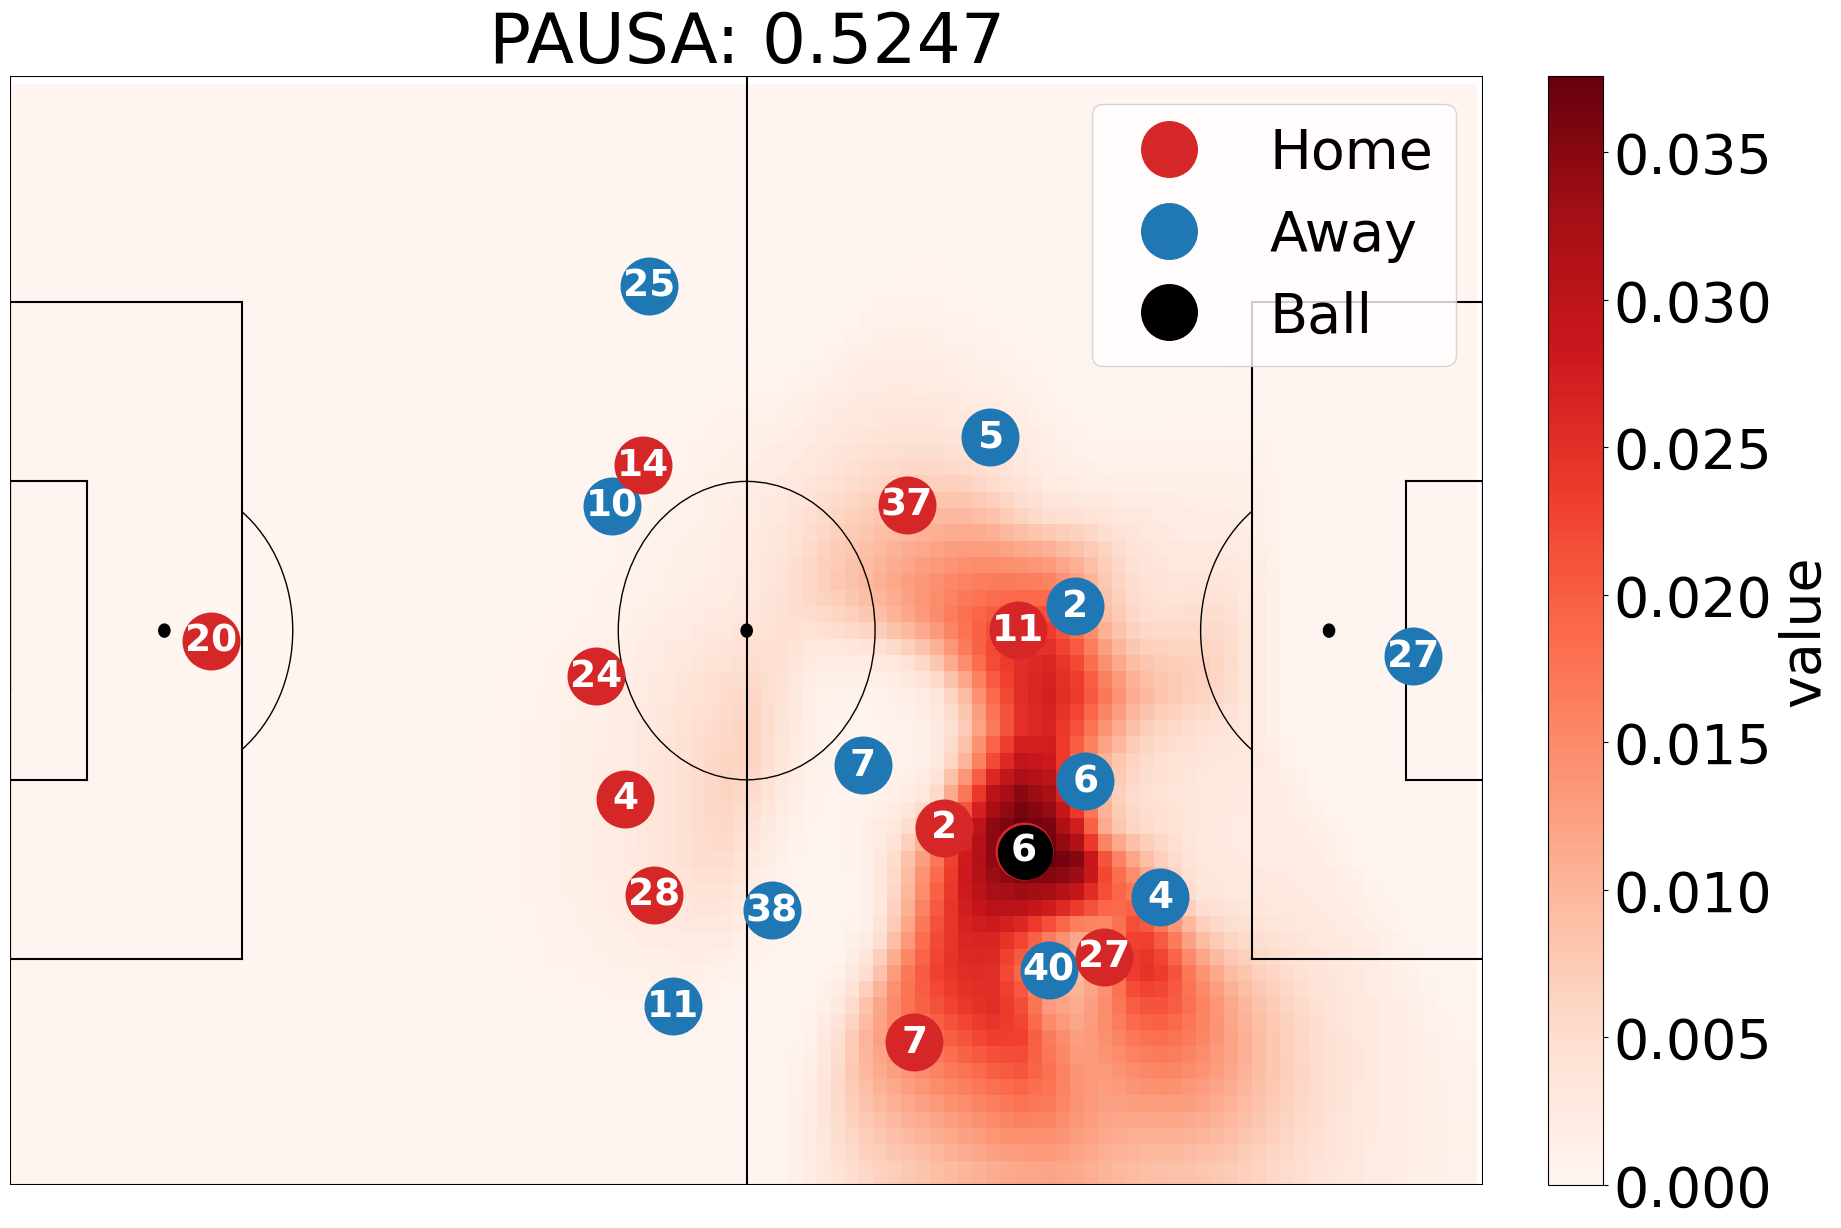

In [23]:
event_num = 217			 # example(WMX): 244(slower) , 116, 209(faster), 239
max_value = None
print(f"Using max_value: {max_value}")

calc_obso_for_event(event_num, before_margin=75, after_margin=25)
trace = visualize_obso_for_event(event_num, max_value, before_margin=0, after_margin=0, component="obso_map")

vis_events = pass_events.loc[[event_num]]
vis_events[["start_x", "end_x"]] += 52.5
vis_events[["start_y", "end_y"]] += 34
vis_events


----Optimal Frame: 43706----


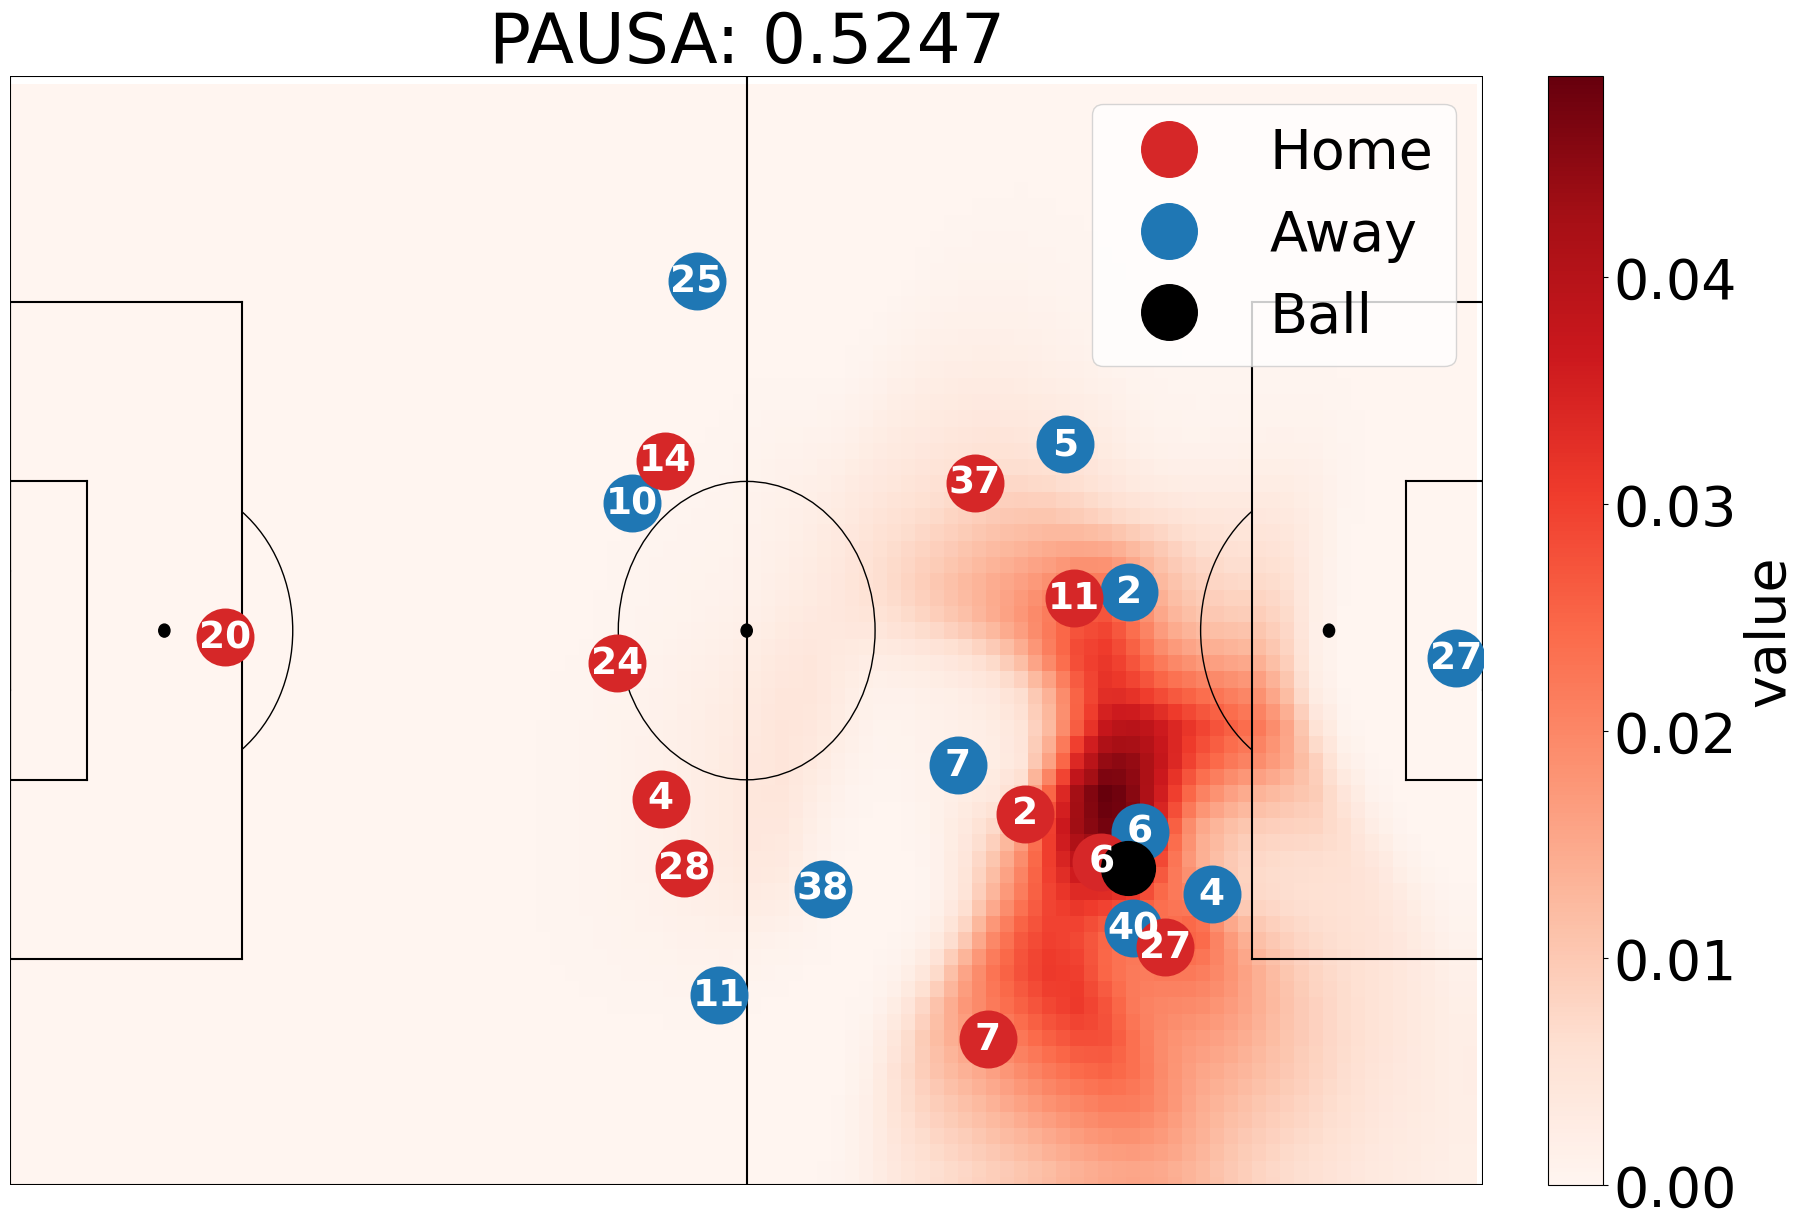

In [19]:
visualize_virtual_obso_for_event(event_num, max_value, before_margin=75, after_margin=25)